# Neale diseases genes (Pascal) and vascular phenotypes genes (Pascal)
## Unfinished!

###### First version 17/06/2022
###### Latest modif 11/10/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob

DATE = datetime.now().strftime("%Y-%m-%d")

In [2]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
ventile_num='Zekavat'
date_used='2022_11_23' #'2022_08_17'
#directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/'+str(date_used)+'_'+str(ventile_num) +'/'
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/'
save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/gcorr_diseases/'


type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')


#neale_csv_name='11_10_2022_diseases_genes.csv'

In [13]:
directory_diseases_neale_pascal = '/HDD/data/ukbb/disease_sumstats/VARIANTS/'
os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]

### compute df with Neale diseases' genes

for file in glob.glob("*__gene_scores"):
    print(file)
    #if file.endswith('qc_only_rs_notna_mod_variants'): ## TO DO confirmar
        #print(file)
    
    df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    pheno, b = file.split(".gwas.imputed_v3.both_sexes.tsv__gene_scores")
    aux, pheno_name = pheno.split("only_rs_notna_mod_variants_")
    
    data={
    'pheno':  pheno,
    'name_pheno': pheno_name,
    'N genes': len(df_significant),
    'names': df_significant['gen'].to_list()
    }
    l_diseases_all.append(data)

df_genes_neale =pd.DataFrame(l_diseases_all)

df_genes_neale


#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale['names'].iloc[4][2]
#list_pheno_neale=['4079_irnt'] #list(df_genes_neale['pheno'])
#['4080_irnt', '102_irnt', '4056_irnt', '5610_3', '4079_irnt', '1717', '3894_irnt']

#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]
#df_genes_neale_red['pheno_name'] = ['SBP_irnt', 'PR_irnt', 'Stroke_irnt', 'Presbyopia_3', 'DBP_irnt', 'Skin_color', 'heart_attack_irnt']

only_rs_notna_mod_variants_5843_1.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_1717.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_4080_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_5855_1.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_4056_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_4079_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_4079_raw.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_3894_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_5843_3.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_3627_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_102_raw.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_21021_raw.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_21021_irnt.gwas.im

,pheno,name_pheno,N genes,names
0,only_rs_notna_mod_variants_5843_1,5843_1,1,[EXOSC4]
1,only_rs_notna_mod_variants_1717,1717,468,"[CDK10, RP11-368I7.4, DPEP1, CHMP1A, SPATA33, ..."
2,only_rs_notna_mod_variants_4080_irnt,4080_irnt,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
3,only_rs_notna_mod_variants_5855_1,5855_1,0,[]
4,only_rs_notna_mod_variants_4056_irnt,4056_irnt,0,[]
5,only_rs_notna_mod_variants_4079_irnt,4079_irnt,910,"[CSK, RP1-278O22.1, LMAN1L, CYP1A2, CPLX3, ULK..."
6,only_rs_notna_mod_variants_4079_raw,4079_raw,905,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, RP1-278O2..."
7,only_rs_notna_mod_variants_3894_irnt,3894_irnt,0,[]
8,only_rs_notna_mod_variants_5843_3,5843_3,0,[]
9,only_rs_notna_mod_variants_3627_irnt,3627_irnt,0,[]


In [5]:
#### TO DO: Plot the results in a better way once it is decided!

In [137]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
for file in all_files:
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['gen'].to_list()
    set_pheno=set(df_significant['gen'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')

            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(l_diseases_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    
    

mean_angle_taa
5843_1 1 0
1717 468 0
4080_irnt 959 0
4079_irnt 910 1
4079_raw 905 1
102_raw 884 2
21021_irnt 3 0
1558 276 1
102_irnt 907 2
4080_raw 838 0
2976_irnt 106 0


mean_angle_tva
5843_1 1 0
1717 468 0
4080_irnt 959 0
4079_irnt 910 1
4079_raw 905 1
102_raw 884 2
21021_irnt 3 0
1558 276 1
102_irnt 907 2
4080_raw 838 0
2976_irnt 106 0


tau1_vein
5843_1 1 0
1717 468 0
4080_irnt 959 15
4079_irnt 910 15
4079_raw 905 15
102_raw 884 22
21021_irnt 3 0
1558 276 0
102_irnt 907 22
4080_raw 838 12
2976_irnt 106 3


tau1_artery
5843_1 1 0
1717 468 14
4080_irnt 959 26
4079_irnt 910 34
4079_raw 905 33
102_raw 884 14
21021_irnt 3 0
1558 276 0
102_irnt 907 17
4080_raw 838 24
2976_irnt 106 3


ratio_AV_DF
5843_1 1 0
1717 468 9
4080_irnt 959 13
4079_irnt 910 6
4079_raw 905 6
102_raw 884 2
21021_irnt 3 0
1558 276 0
102_irnt 907 6
4080_raw 838 11
2976_irnt 106 0


eq_CRAE
5843_1 1 0
1717 468 0
4080_irnt 959 2
4079_irnt 910 0
4079_raw 905 0
102_raw 884 14
21021_irnt 3 0
1558 276 1
102_irnt 907 14
40

In [140]:
df_genes_neale_intersection

,name_pheno,name_disease,len(set_neale),len(set_pheno_set_neale),name_genes_inters
0,mean_angle_taa,5843_1,1,0,{}
1,mean_angle_taa,1717,468,0,{}
2,mean_angle_taa,4080_irnt,959,0,{}
3,mean_angle_taa,4079_irnt,910,1,{CTD-2568P8.1}
4,mean_angle_taa,4079_raw,905,1,{CTD-2568P8.1}
...,...,...,...,...,...
182,ratio_AV_medianDiameter,21021_irnt,3,0,{}
183,ratio_AV_medianDiameter,1558,276,2,"{IZUMO1, FGF21}"
184,ratio_AV_medianDiameter,102_irnt,907,0,{}
185,ratio_AV_medianDiameter,4080_raw,838,2,"{IZUMO1, FGF21}"


In [85]:
df_file_proper_format=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/05_12_2022_genes_diseases_phenos.csv')
#df_file_proper_format.plot(kind='bar', stacked=True)
# sns.barplot(
#     x="len(set_pheno_set_neale)", 
#     y="name_pheno", 
#     data=df_genes_neale_intersection, 
#     ci=None, 
#     color='#69b3a2');
df_file_proper_format.columns

Index(['disease', 'N_genes', 'mean_angle_taa', 'mean_angle_tva', 'tau1_vein',
       'tau1_artery', 'ratio_AV_DF', 'eq_CRAE', 'ratio_CRAE_CRVE', 'D_A_std',
       'D_V_std', 'eq_CRVE', 'ratio_VD', 'VD_orig_artery', 'bifurcations',
       'VD_orig_vein', 'medianDiameter_artery', 'medianDiameter_vein',
       'ratio_AV_medianDiameter'],
      dtype='object')

In [128]:
print(df_file_proper_format['disease'], df_file_proper_format['N_genes'])

0         5843_1
1           1717
2      4080_irnt
3      4079_irnt
4       4079_raw
5        102_raw
6     21021_irnt
7           1558
8       102_irnt
9       4080_raw
10     2976_irnt
Name: disease, dtype: object 0       1
1     468
2     959
3     910
4     905
5     884
6       3
7     276
8     907
9     838
10    106
Name: N_genes, dtype: int64


In [116]:
df_file_proper_format_mod=df_file_proper_format[['disease', 'mean_angle_taa', 'mean_angle_tva', 'tau1_vein',
       'tau1_artery', 'ratio_AV_DF', 'eq_CRAE', 'ratio_CRAE_CRVE', 'D_A_std',
       'D_V_std', 'eq_CRVE', 'ratio_VD', 'VD_orig_artery', 'bifurcations',
       'VD_orig_vein', 'medianDiameter_artery', 'medianDiameter_vein',
       'ratio_AV_medianDiameter']]
df_file_proper_format_mod=df_file_proper_format_mod.set_index('disease')
df_file_proper_format_plots = df_file_proper_format_mod.T
diseases_name=['1717', '4080_irnt', '4079_irnt', '21021_irnt', '1558', '102_irnt',  '2976_irnt']
diseases_name_new=['Skin colour', 'SBP', 'DBP', 'Pulse wave ASI', 'Alcohol intake freq', 'PR',  'Diabetes']
df_file_proper_format_plots=df_file_proper_format_plots[diseases_name]

In [119]:
def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_proper_format_plots= rename_col_index(df_file_proper_format_plots, diseases_name, diseases_name_new, all_files, all_files_new)

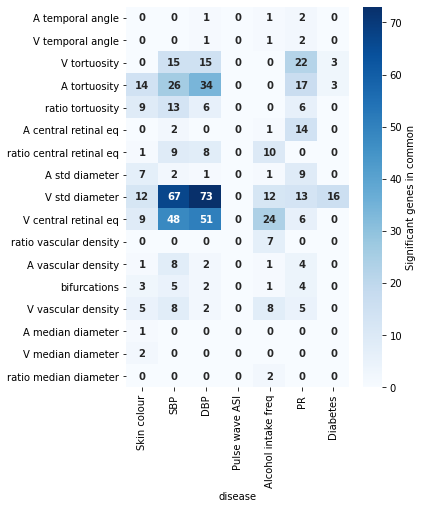

In [123]:
plt.rcParams['font.size'] = '10'
figsize_val_2=(5, 7)
fig, ax = plt.subplots(figsize=figsize_val_2)

fig1 = sns.heatmap(df_file_proper_format_plots, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots).min().max(), 
            vmax=abs(df_file_proper_format_plots).max().max(), 
            cmap='Blues',alpha=1.0, cbar_kws={'label': 'Significant genes in common'})

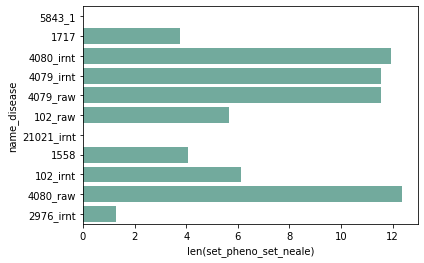

In [74]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [36]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']

,Unnamed: 0,gen,ratio_N_pheno
